<a href="https://colab.research.google.com/github/omniaghazy/Machine-Learning-Algorithms/blob/main/LR_R_L_E.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

                                                            
*   DATA
*   Libraries





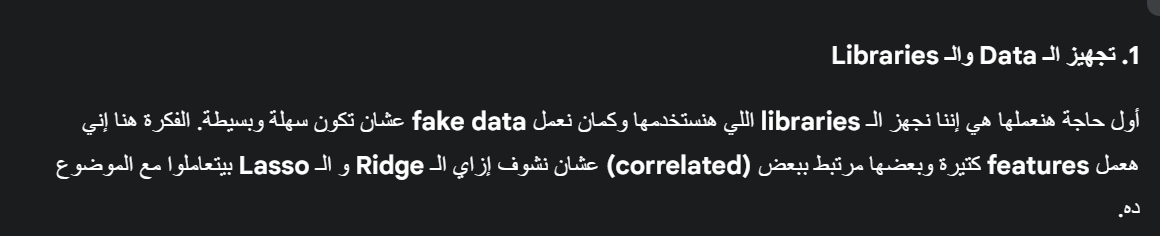

In [1]:
# Import the necessary libraries
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_squared_error

# ----------------------------------------------------
# 1. Create a synthetic dataset
# ----------------------------------------------------
# We'll create 500 samples with 10 features, some of which are correlated.
X = np.random.randn(500, 10)
y = 2 * X[:, 0] + 3 * X[:, 1] + 0.5 * X[:, 2] + np.random.randn(500) * 2

# Let's introduce some collinearity (make feature 3 a mix of feature 0 and 1)
X[:, 3] = X[:, 0] + X[:, 1] + np.random.randn(500) * 0.1

# ----------------------------------------------------
# 2. Split the data and scale it
# ----------------------------------------------------
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# It's a best practice to scale the data for regularization methods
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

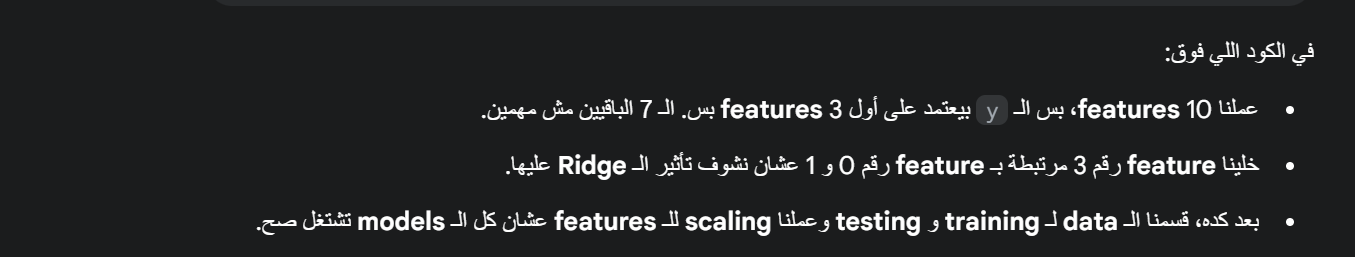

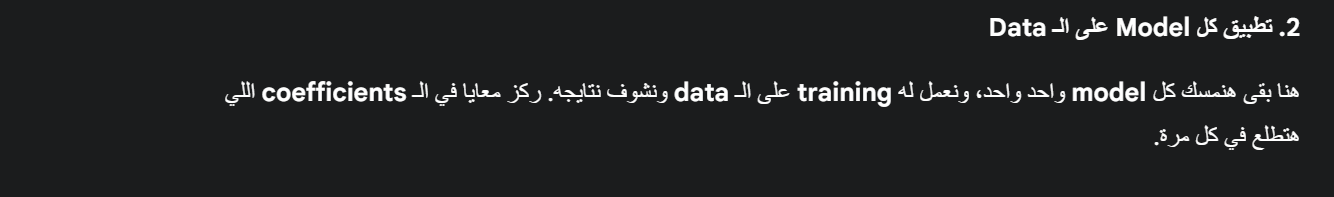

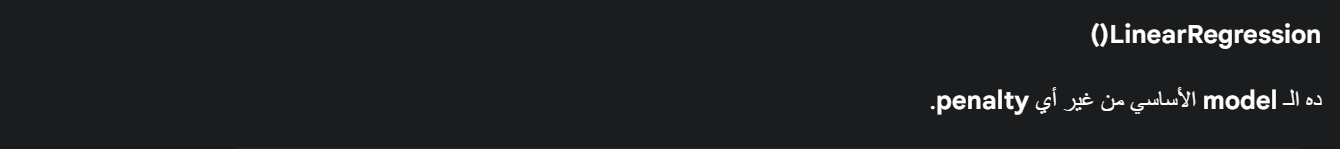

In [2]:
# ----------------------------------------------------
# 3. Linear Regression (No Regularization)
# ----------------------------------------------------
print("Linear Regression Results:")
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)

y_pred_lr = lr.predict(X_test_scaled)
mse_lr = mean_squared_error(y_test, y_pred_lr)

print(f"  Coefficients: {np.round(lr.coef_, 2)}")
print(f"  Mean Squared Error (MSE): {round(mse_lr, 2)}\n")

Linear Regression Results:
  Coefficients: [ 0.23  1.34  0.38  2.6  -0.12  0.03 -0.03  0.14 -0.05  0.08]
  Mean Squared Error (MSE): 3.64



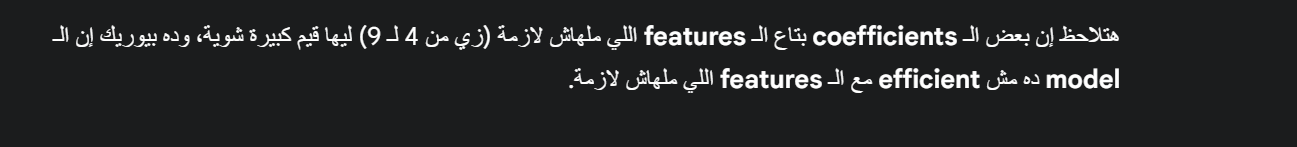

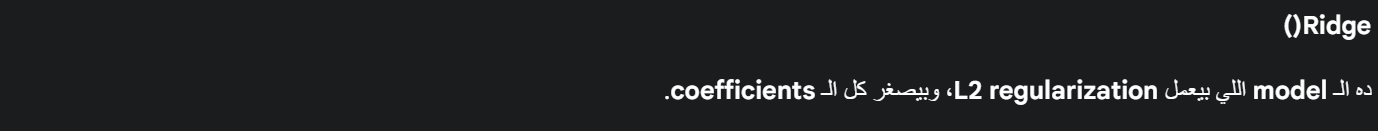

In [3]:
# ----------------------------------------------------
# 4. Ridge Regression (L2 Regularization)
# ----------------------------------------------------
print("Ridge Regression Results:")
ridge = Ridge(alpha=1.0)
ridge.fit(X_train_scaled, y_train)

y_pred_ridge = ridge.predict(X_test_scaled)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)

print(f"  Coefficients: {np.round(ridge.coef_, 2)}")
print(f"  Mean Squared Error (MSE): {round(mse_ridge, 2)}\n")

Ridge Regression Results:
  Coefficients: [ 0.49  1.6   0.38  2.22 -0.12  0.03 -0.03  0.14 -0.05  0.07]
  Mean Squared Error (MSE): 3.64



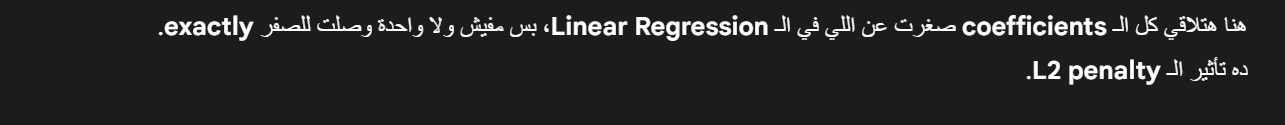

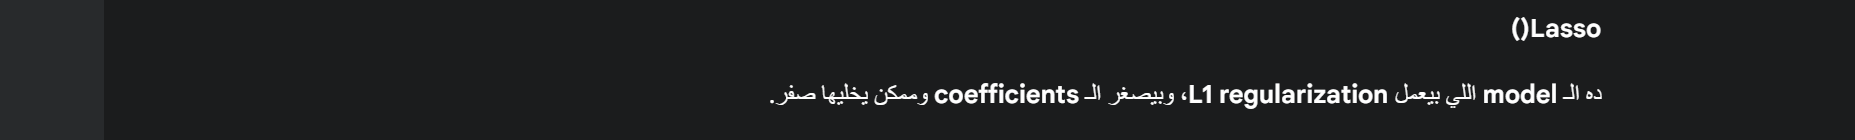

In [4]:
# ----------------------------------------------------
# 5. Lasso Regression (L1 Regularization)
# ----------------------------------------------------
print("Lasso Regression Results:")
lasso = Lasso(alpha=0.1)
lasso.fit(X_train_scaled, y_train)

y_pred_lasso = lasso.predict(X_test_scaled)
mse_lasso = mean_squared_error(y_test, y_pred_lasso)

print(f"  Coefficients: {np.round(lasso.coef_, 2)}")
print(f"  Mean Squared Error (MSE): {round(mse_lasso, 2)}\n")

Lasso Regression Results:
  Coefficients: [ 0.    1.05  0.29  2.87 -0.01 -0.   -0.    0.03 -0.    0.  ]
  Mean Squared Error (MSE): 3.59



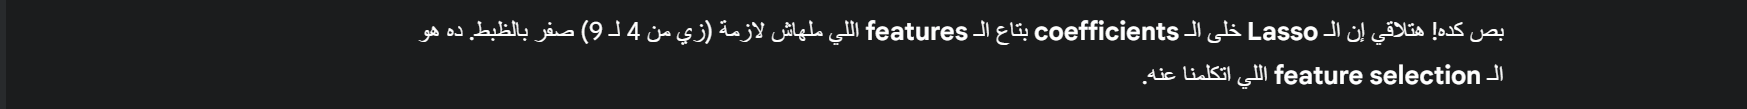

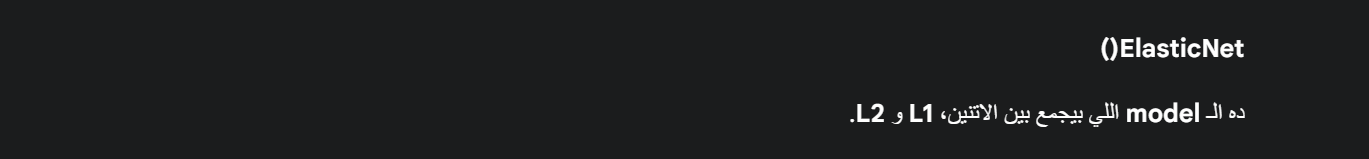

In [5]:
# ----------------------------------------------------
# 6. ElasticNet (L1 + L2 Regularization)
# ----------------------------------------------------
print("ElasticNet Results:")
elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5)
elastic_net.fit(X_train_scaled, y_train)

y_pred_en = elastic_net.predict(X_test_scaled)
mse_en = mean_squared_error(y_test, y_pred_en)

print(f"  Coefficients: {np.round(elastic_net.coef_, 2)}")
print(f"  Mean Squared Error (MSE): {round(mse_en, 2)}\n")

ElasticNet Results:
  Coefficients: [ 0.57  1.62  0.32  2.01 -0.06  0.   -0.    0.08 -0.    0.03]
  Mean Squared Error (MSE): 3.53



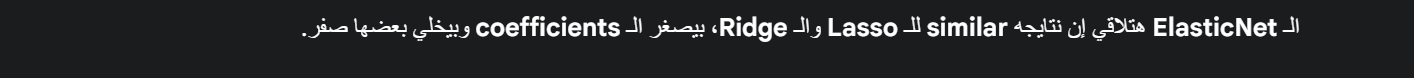

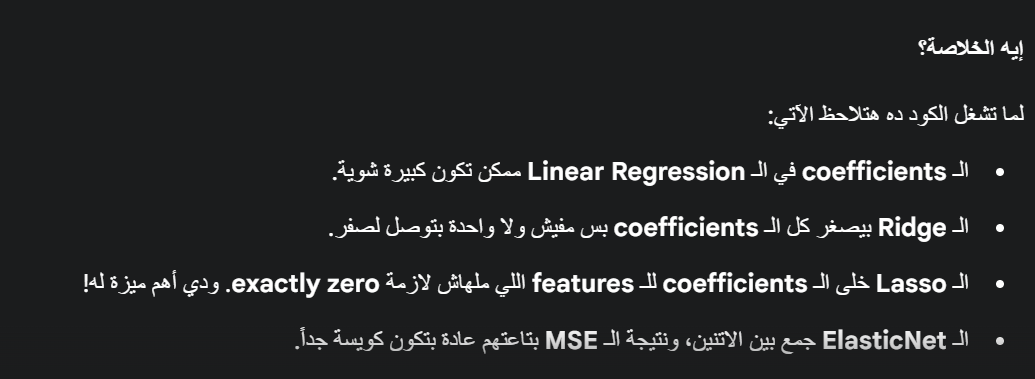